In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

In [12]:
x = np.random.uniform(low=0, high=0.5, size=1000)
y = np.random.uniform(low=-0, high=1, size=1000)
points1= np.column_stack((x, y))
print(points1)
print(len(points1))

[[0.32861168 0.40203422]
 [0.09349214 0.81252449]
 [0.07653122 0.17406765]
 ...
 [0.24558121 0.28023903]
 [0.28423234 0.48452049]
 [0.21914276 0.5596373 ]]
1000


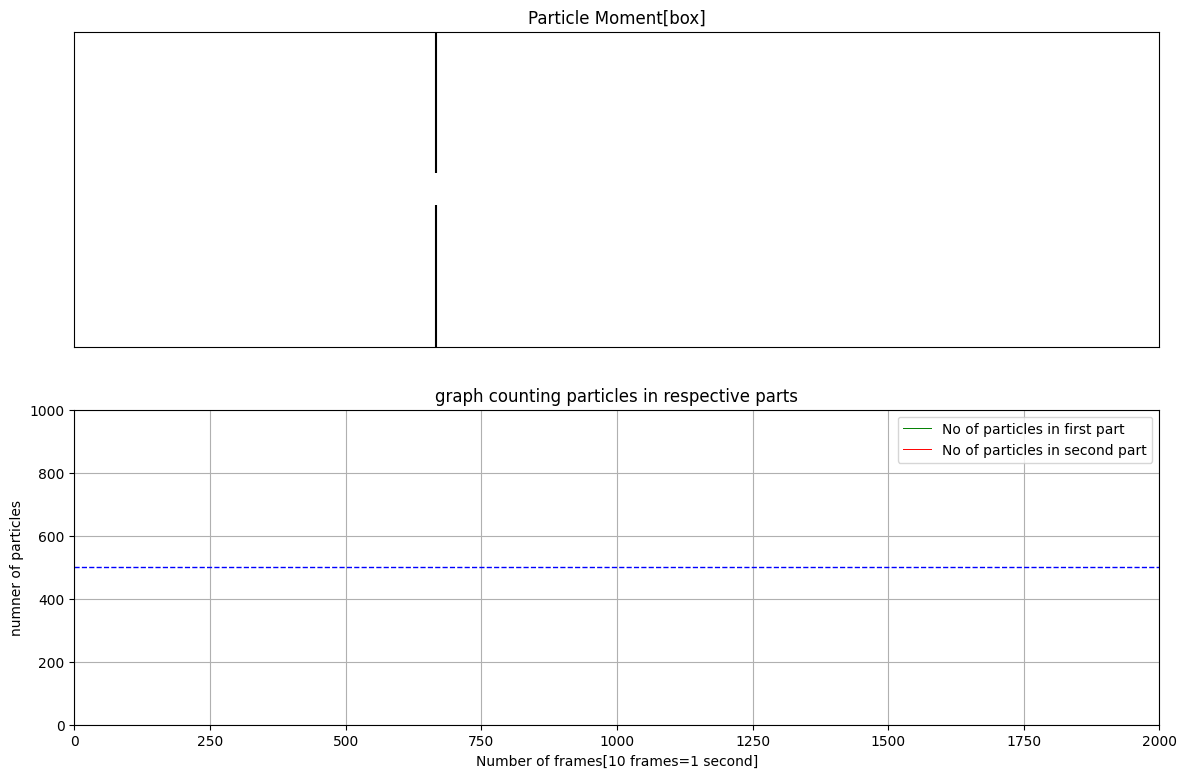

In [13]:

fig, axes = plt.subplots(2, 1, figsize=(14,9))
ax=axes[0]
lin1,=ax.plot([],[],'o',color='blue',ms=1)
ax.set_title("Particle Moment[box]")
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1)
x1=0.5
ax.vlines(x1, 0, 0.45, colors='black')
ax.vlines(x1, 0.55, 1, colors='black')
ax.set_xticks([])
ax.set_yticks([]) 
ax=axes[1]
ax.set_title('graph counting particles in respective parts')
ax.set_ylim(0,1000)
ax.set_xlim(0,2000)
time_text = ax.text(0.65, 0.95, '', fontsize=15,bbox=dict(facecolor='white', edgecolor='black'), transform=ax.transAxes)

lin2,=ax.plot([],[],color='green',label='No of particles in first part',linewidth=0.7)
lin3,=ax.plot([],[],color='red',label='No of particles in second part',linewidth=0.7)
ax.set_xlabel('Number of frames[10 frames=1 second]')
ax.set_ylabel('numner of particles')
ax.grid('minor')
ax.legend(loc='upper right')
ax.axhline(y=500, color='blue', linestyle='--', linewidth=1)


In [14]:
x_data = []
c1_data = []
c2_data = []
def animate(i):
 i1 = np.random.randint(0, len(points1))  # Random index
 r1= points1[i1]
 if r1[0]<0.5 :
   r1[0]=np.random.uniform(low=0.5,high=1.5)
   r1[1]=np.random.uniform(low=0,high=1)
   points1[i1]=r1
 else:
   r1[0]=np.random.uniform(low=0,high=0.5)
   r1[1]=np.random.uniform(low=0,high=1)
   points1[i1]=r1
 count1=points1[points1[:,0]<0.5]
 count2=points1[points1[:,0]>0.5]
 c1=len(count1)
 c2=len(count2) 
 x_data.append(i)
 c1_data.append(c1)
 c2_data.append(c2)
 time_text.set_text('t={:.2f}'.format(i/10))
 lin1.set_data(points1[:, 0], points1[:, 1])
 lin2.set_data(x_data,c1_data)
 lin3.set_data(x_data,c2_data)
 return lin1, lin2,lin3, time_text
ani = animation.FuncAnimation(fig, animate, frames=2000, interval=50)
ani.save('equilirium2.gif',writer='pillow',fps=10,dpi=100)